# FRUIT CLASSIFICATION DENGAN SVM DAN PCA

Anggota kelompok:

•	Ivander Achmad Wandi  		(19/442377/PA/19126)

•	Hero Prakosa Wibowo Priyanto 	(20/455383/PA/19598)

•	Khairunas Rhamadhani Wiasanto 	(20/462086/PA/20057)

•	Fariz Harisuddin Dharmawan 	(20/455380/PA/19595)


In [ ]:
# install library
!pip install --upgrade pip
!pip install scipy

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\Ivand\anaconda3\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np 
import cv2
import glob
import os
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

print(os.listdir("./input"))
dim = 100

C:\Users\Ivand\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ivand\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Ivand\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


['fruits-360-original-size', 'fruits-360_dataset']


# 1. SUPPORT VECTOR MACHINES

In [ ]:
def getYourFruits(fruits, data_type, print_n=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    for v in val:
        path = "./input/*/fruits-360/" + v + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
    images = np.array(images)
    labels = np.array(labels)
    return images, labels
    
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("./input/*/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

In [ ]:
#Mengambil dataset

fruits = ['Orange', 'Banana' , 'Strawberry', 'Apple Golden 1', 'Kiwi' , 
          'Lemon', 'Cocos' , 'Pineapple' , 'Peach', 'Cherry 1', 'Cherry 2', 'Mandarine']
#fruits = getAllFruits() #RAM gk kuat

#Mengambil Image dan Label
X, y =  getYourFruits(fruits, 'Training')
X_test, y_test = getYourFruits(fruits, 'Test')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [ ]:
#SVM
from sklearn.svm import SVC
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y) 
y_pred = model.predict(X_test)
print("Hasil klasifikasi dengan SVM: ")
target_names = fruits
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Hasil klasifikasi dengan SVM: 
                precision    recall  f1-score   support

        Orange       1.00      1.00      1.00       639
        Banana       1.00      1.00      1.00       656
    Strawberry       1.00      1.00      1.00       656
Apple Golden 1       1.00      1.00      1.00       640
          Kiwi       1.00      1.00      1.00       622
         Lemon       1.00      1.00      1.00       656
         Cocos       1.00      1.00      1.00       656
     Pineapple       1.00      1.00      1.00       656
         Peach       1.00      1.00      1.00       656
      Cherry 1       1.00      1.00      1.00       656
      Cherry 2       1.00      1.00      1.00       984
     Mandarine       1.00      1.00      1.00       656

      accuracy                           1.00      8133
     macro avg       1.00      1.00      1.00      8133
  weighted avg       1.00      1.00      1.00      8133



# 2. Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA

def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "./input/*/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "./input/*/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("./input/*/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

In [ ]:
def showPCA(image,X2, X10, X50):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,4,1)
    ax1.axis('off')
    ax1.set_title('Original image')
    plt.imshow(image)
    ax1 = fig.add_subplot(1,4,2)
    ax1.axis('off') 
    ax1.set_title('50 PC')
    plt.imshow(X50)
    ax1 = fig.add_subplot(1,4,3)
    ax1.axis('off') 
    ax1.set_title('10 PC')
    plt.imshow(X10)
    ax2 = fig.add_subplot(1,4,4)
    ax2.axis('off') 
    ax2.set_title('2 PC')
    plt.imshow(X2)
    plt.show()

def computePCA(n, im_scaled, image_id):
    pca = PCA(n)
    principalComponents = pca.fit_transform(im_scaled)
    im_reduced = pca.inverse_transform(principalComponents)
    #print(im_reduced.shape)
    newImage = scaler.inverse_transform(im_reduced[image_id].reshape(1,-1))
    return newImage

In [ ]:
#Pilih buah
fruits = ['Pineapple']

#Dapatkan gambar dan Label 
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Gunakan k-fold
X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale gambar
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

There are  490   TRAINING  images of  PINEAPPLE
There are  166   TEST  images of  PINEAPPLE


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


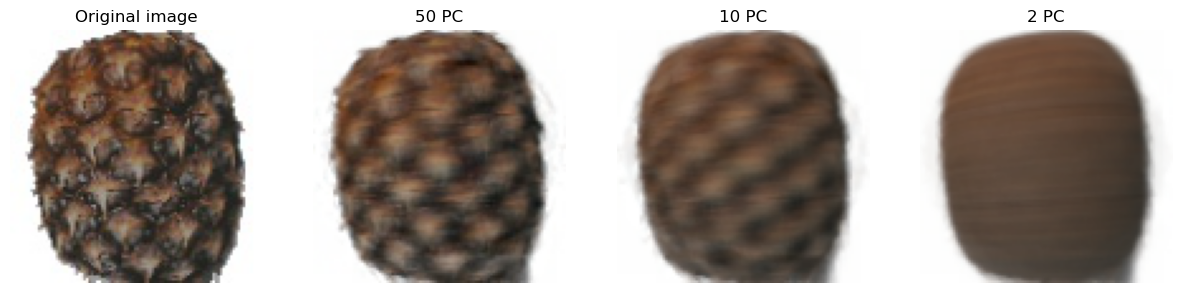

In [ ]:
image_id = 5 #Gambar ke
image = X_t[image_id]

#Compute PCA
X_2 = computePCA(2, X_train,image_id)
X_10 = computePCA(10, X_train,image_id)
X_50 = computePCA(50, X_train,image_id)

#Reshape in order to plot images
X2 = np.reshape(X_2, (dim,dim,3)).astype(int)
X10 = np.reshape(X_10, (dim,dim,3)).astype(int)
X50 = np.reshape(X_50, (dim,dim,3)).astype(int)

#Plot
showPCA(image, X2, X10, X50)

#Warning! jika gambar tidak keluar restart kernel dan ulangi dari bagian PCA